## Importation des librairies et des jeux de données nécessaires à notre travail

In [90]:
import sys
sys.path.insert(0, "/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text")
import pandas as pd
import xgboost as xgb 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,auc, roc_curve, roc_auc_score
from src.functions import plot_roc

In [91]:
emotion_final = pd.read_csv("/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/data/02_cleaned/cleaned_emotion_final.csv")

In [92]:
text_emotion = pd.read_csv("/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/data/02_cleaned/cleaned_text_emotion.csv")

## Etape 1 : Comparaison de classification du premier jeu de données avec la classification du second jeu de données


### Premier jeu de données

#### Label-encoding des émotions

In [93]:
conditions = [(emotion_final['label'] == "sadness") | (emotion_final['label'] == "fear") | (emotion_final['label'] == "anger"), (emotion_final['label'] == "love") | (emotion_final['label'] == "surprise") | (emotion_final['label'] == "happy")] 

In [94]:
values = [0, 1]

In [95]:
emotion_final['binary_emotion'] = np.select(conditions, values)

#### Choix des variables

In [96]:
X = emotion_final['text']
y = emotion_final['binary_emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Mise en place du modèle

In [97]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(emotion_final['text'])

CountVectorizer(lowercase=False, min_df=0)

In [98]:
text_train = vectorizer.transform(X_train)
text_test = vectorizer.transform(X_test)

In [99]:

#param = {}
#param['booster'] = 'gbtree'
#param['objective'] = 'binary:logistic'
#param["eval_metric"] = "error"
#param['eta'] = 0.3
#param['gamma'] = 0
#param['max_depth'] = 6
#param['min_child_weight']=1
#param['max_delta_step'] = 0
#param['subsample']= 1
#param['colsample_bytree']=1
#param['silent'] = 1
#param['seed'] = 0
#param['base_score'] = 0.5

In [100]:
xgb_model = xgb.XGBClassifier()
xgb_fit = xgb_model.fit(text_train, y_train)

[11:29:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [101]:
score = xgb_model.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.8938


In [102]:
y_pred = xgb_fit.predict(text_test)

In [103]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

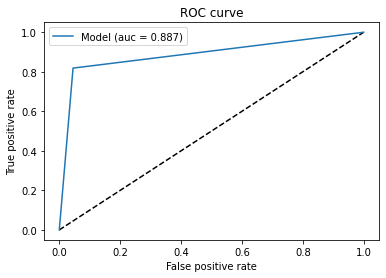

In [104]:
plot_roc(y_test, y_pred)

### Second jeu de données

#### Label encoding des émotions

In [105]:
conditions = [(text_emotion['label'] == "empty") | (text_emotion['label'] == "sadness") | (text_emotion['label'] == "worry") | (text_emotion['label'] == "hate") | (text_emotion['label'] == "boredom") | (text_emotion['label'] == "anger"), (text_emotion['label'] == "enthusiasm") | (text_emotion['label'] == "neutral") | (text_emotion['label'] == "surprise") | (text_emotion['label'] == "love") | (text_emotion['label'] == "fun") | (text_emotion['label'] == "happiness") | (text_emotion['label'] == "relief")] 

In [106]:
values = [0, 1]

In [107]:
text_emotion['binary_emotion'] = np.select(conditions, values)

Choix des variables

In [108]:
X = text_emotion['text']
y = text_emotion['binary_emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Mise en place du modèle

In [109]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(text_emotion['text'])

CountVectorizer(lowercase=False, min_df=0)

In [110]:
text_train = vectorizer.transform(X_train)
text_test = vectorizer.transform(X_test)

In [111]:
xgb_model = xgb.XGBClassifier()
xgb_fit = xgb_model.fit(text_train, y_train)

/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:30:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [112]:
score = xgb_model.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.7094


In [113]:
y_pred = xgb_fit.predict(text_test)

In [114]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

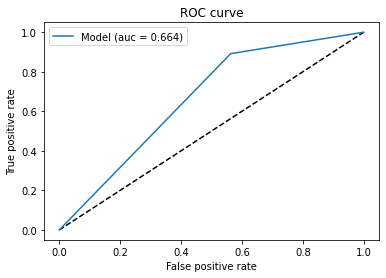

In [115]:
plot_roc(y_test, y_pred)

## Etape 2 : Combiner les deux jeux de données pour améliorer les résultats de prédiction

In [116]:
emotion_final_extracted = emotion_final[['text', 'label']]
text_emotion_extracted = text_emotion[['text', 'label']]
new_emotion_text = pd.concat([emotion_final_extracted, text_emotion_extracted])

In [117]:
new_emotion_text["label"].replace({'happiness': 'happy'}, inplace=True)

### Label encoding des données

In [118]:
conditions = [(new_emotion_text['label'] == "empty") | (new_emotion_text['label'] == "sadness") | (new_emotion_text['label'] == "worry") | (new_emotion_text['label'] == "hate") | (new_emotion_text['label'] == "boredom") | (new_emotion_text['label'] == "anger") | new_emotion_text['label'] == "fear", (new_emotion_text['label'] == "enthusiasm") | (new_emotion_text['label'] == "neutral") | (new_emotion_text['label'] == "surprise") | (new_emotion_text['label'] == "love") | (new_emotion_text['label'] == "fun") | (new_emotion_text['label'] == "happy") | (new_emotion_text['label'] == "relief")] 

In [119]:
values = [0, 1]

In [120]:
new_emotion_text['binary_emotion'] = np.select(conditions, values)

### Choix des variables

In [121]:
X = new_emotion_text['text']
y = new_emotion_text['binary_emotion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Mise en place du modèle

In [122]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(new_emotion_text['text'])

CountVectorizer(lowercase=False, min_df=0)

In [123]:
text_train = vectorizer.transform(X_train)
text_test = vectorizer.transform(X_test)

In [124]:
xgb_model = xgb.XGBClassifier()
xgb_fit = xgb_model.fit(text_train, y_train)

/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:31:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [125]:
score = xgb_model.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.7502


In [126]:
y_pred = xgb_fit.predict(text_test)

In [127]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

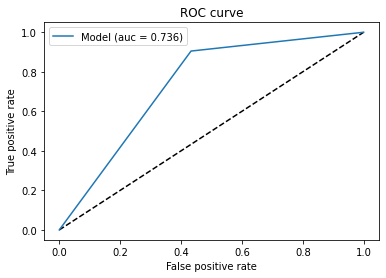

In [128]:
plot_roc(y_test, y_pred)

## Etape 3 : Utiliser les nouvelles émotions du jeu de données 2 et les prédire sur les messages du jeu 1

In [129]:
X = text_emotion['text']
y = text_emotion['binary_emotion']
X_test = emotion_final['text']
y_test = emotion_final['binary_emotion']

In [130]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X)
vectorizer.fit(X_test)

CountVectorizer(lowercase=False, min_df=0)

In [131]:
text_train = vectorizer.transform(X)
text_test = vectorizer.transform(X_test)

In [132]:
xgb_model = xgb.XGBClassifier()
xgb_fit = xgb_model.fit(text_train, y)

/home/apprenant/simplon_project/Brief-Emotion-Analysis-Text/env/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:32:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [133]:
y_pred = xgb_fit.predict(text_test)

In [134]:
score = xgb_model.score(text_test, y_test)
print("Accuracy:", round(score, ndigits=4))

Accuracy: 0.579


In [135]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])